<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Quadratic_Discriminant_Analysis_and_Naive_Bayes_in_Financial_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QDA Accuracy: 1.0000
Naive Bayes Accuracy: 0.9833


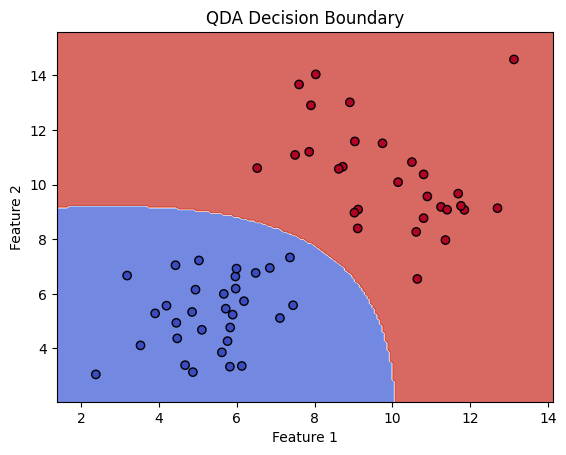

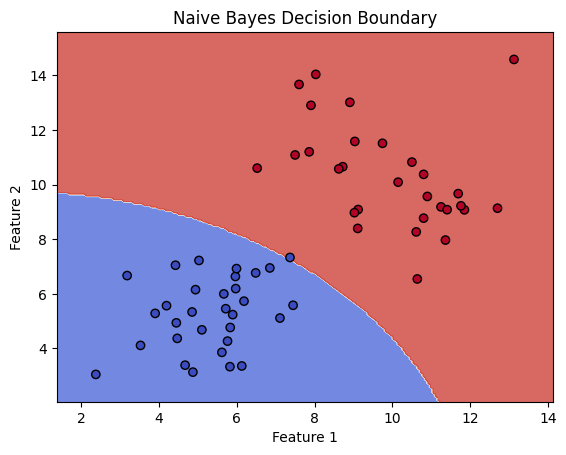

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Simulating financial data
np.random.seed(42)
n_samples = 200
n_features = 2

# I simulate two classes with differing covariance matrices to test QDA.
class_1 = np.random.multivariate_normal(mean=[5, 5], cov=[[2, 1], [1, 2]], size=n_samples // 2)
class_2 = np.random.multivariate_normal(mean=[10, 10], cov=[[3, -1], [-1, 3]], size=n_samples // 2)

X = np.vstack([class_1, class_2])
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_preds = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_preds)

# I use Naive Bayes as a simpler alternative when dimensionality is high.
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)

# Results
print(f"QDA Accuracy: {qda_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Visualization of decision boundaries
def plot_decision_boundary(model, X, y, title):
    # I create a grid to evaluate the model's decision boundary.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# I plot the decision boundaries for QDA and Naive Bayes
plot_decision_boundary(qda, X_test, y_test, "QDA Decision Boundary")
plot_decision_boundary(nb, X_test, y_test, "Naive Bayes Decision Boundary")
